In [1]:
import pandas as pd
import numpy as np
from time import time
import datetime
#import quandl as quandl
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Reshape,Dropout,Activation,Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
#from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Conv1D,MaxPooling1D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
#import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
#from tensorflow.python.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
#from tensorflow.keras.applications.resnet50 import ResNet50
#from tensorflow.keras.models import load_model
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#-------------------------------------------------------------------------------------------------------------
# 1: 加载数据文件，查看数据信息
df = pd.read_csv("C:\\Users\\HT\\Desktop\\论文\Real\\train.csv")
#df.head() # broadband 即可：0-离开，1-留存
df_test = pd.read_csv("C:\\Users\\HT\\Desktop\\论文\\Real\\test.csv")

from tqdm import tqdm_notebook
from sklearn.preprocessing import LabelEncoder
# LabelEncoder
for col in tqdm_notebook(df.columns):
    if df[col].dtype == "object":
        encoder = LabelEncoder()
        encoder.fit(list(df[col].values) + list(df_test[col].values))
        df[col] = encoder.transform(list(df[col].values))
        df_test[col] = encoder.transform(list(df_test[col].values))
        
df = df.reset_index() # 重置索引
df_test = df_test.reset_index()
def clean_top_cols(df):
    new_cols = [col for col in df.columns if df[col].value_counts(dropna=False, normalize=True).values[0] > 0.99]
    return new_cols
df_cols = clean_top_cols(df)
df_test_clos = clean_top_cols(df_test)
cols_to_drop = list(set(df_cols + df_test_clos))
if 'bad_good' in cols_to_drop : # 查看标签列是否在其中
    cols_to_drop.remove('bad_good') # 删除标签列
#print("原始的train shape : ", df)
df = df.drop(cols_to_drop, axis=1)
df_test = df_test.drop(cols_to_drop, axis=1)
#print("清理后的train shape : ", df.shape)

y = df['bad_good'] # 标签
X1 = df.iloc[:, 1:-1] # 客户 id 没有用，故丢弃 cust_id

C:\Users\HT\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\HT\AppData\Local\Temp/ipykernel_4280/2223015790.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for col in tqdm_notebook(df.columns):


  0%|          | 0/627 [00:00<?, ?it/s]

In [3]:
# #X = x[:-1]
# X2 = X1
# X1 = np.expand_dims(X2, axis=2)
# #X= np.reshape(X1,(626, 1))
# X1.shape

(285285, 357, 1)

In [4]:
y1 = y

In [21]:
# #X = x[:-1]
# X = np.expand_dims(X1, axis=2)
# X.shape

(285277, 357, 1)

In [5]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X1, y1,test_size=0.5,shuffle=False)
#X_train,X_test,Y_train,Y_test = train_test_split(X_train1, Y_train1, test_size=0.2,shuffle=False)
print(X_train1.shape)
print(X_test1.shape)
print(Y_test1.shape)
print(Y_train1.shape)

(142642, 357)
(142643, 357)
(142643,)
(142642,)


In [ ]:
# model = Sequential()
# model.add(Conv1D(1,1,padding='same',activation='relu',input_shape=(357,1)))
# model.add(MaxPooling1D(2))
# model.add(Flatten())
# model.add(Dense(357))
# model.add(Dropout(0.2))
# model.add(Activation('relu'))
# model.add(Dense(1))
# model.add(Activation("sigmoid"))
# #model.add(Activation("relu"))

# #from tensorflow.keras.optimizers import Adam
# model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
# #model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
# model.summary()
# train_history=model.fit(x=X_train1,
#                         y=Y_train1,
#                         validation_split=0.4,
#                         epochs=30,
#                         batch_size=100,verbose=2)

In [106]:
np.array(X_train1.reshape())
#X_train1 = X_train1.reshape(357,1)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [141]:
#from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
model=Sequential()
model.add(Dense(units=10,input_dim=357, activation='ReLU'))
model.add(Dense(units=32,
#                 kernel_initializer='random_uniform', bias_initializer='zeros',
                activation='ReLU'))                
model.add(Dropout(0.2))
#model.add(Activation('PReLU'))
model.add(Dense(units=32,
#                 kernel_initializer='random_uniform', bias_initializer='zeros',
                activation='ReLU'))
model.add(Dropout(0.2))
#model.add(Activation('PReLU'))
# model.add(Flatten())
# model.add(Dense(32))
# model.add(Activation('PReLU'))
# model.add(Dropout(0.2))
model.add(Dense(units=10,
#                 kernel_initializer='random_uniform', bias_initializer='zeros',
                activation='ReLU'))
model.add(Dense(units=1,
                activation='sigmoid'))
model.compile(loss='binary_crossentropy',
                  optimizer= tf.optimizers.RMSprop(lr = 0.0005),metrics=['accuracy'])
train_history=model.fit(x=X_train1,
                        y=Y_train1,
                        validation_split=0.1,
                        epochs=300,
                        batch_size=50,verbose=2)
model.summary()

C:\Users\HT\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/30
2568/2568 - 7s - loss: 71094.5391 - accuracy: 0.9226 - val_loss: 51.3730 - val_accuracy: 0.9938
Epoch 2/30
2568/2568 - 5s - loss: 97.0141 - accuracy: 0.9194 - val_loss: 35.1117 - val_accuracy: 0.9940
Epoch 3/30
2568/2568 - 5s - loss: 29.8324 - accuracy: 0.9297 - val_loss: 32.7577 - val_accuracy: 0.9940
Epoch 4/30
2568/2568 - 5s - loss: 29.7080 - accuracy: 0.9383 - val_loss: 5.6600 - val_accuracy: 0.9939
Epoch 5/30
2568/2568 - 5s - loss: 11.8835 - accuracy: 0.9477 - val_loss: 2.4520 - val_accuracy: 0.9940
Epoch 6/30
2568/2568 - 5s - loss: 10.1100 - accuracy: 0.9483 - val_loss: 0.9824 - val_accuracy: 0.9940
Epoch 7/30
2568/2568 - 5s - loss: 18.4401 - accuracy: 0.9490 - val_loss: 0.0678 - val_accuracy: 0.9940
Epoch 8/30
2568/2568 - 5s - loss: 3.6768 - accuracy: 0.9586 - val_loss: 10.4341 - val_accuracy: 0.9941
Epoch 9/30
2568/2568 - 5s - loss: 11.5951 - accuracy: 0.9626 - val_loss: 0.0780 - val_accuracy: 0.9940
Epoch 10/30
2568/2568 - 5s - loss: 0.5501 - accuracy: 0.9634 - val_

In [119]:
scores=model.evaluate( x=X_test , y=Y_test)

5931/5931 [==============================] - 16s 3ms/step - loss: 0.1080 - accuracy: 0.9824


In [17]:
print(X_test.shape)
print(Y_test.shape)

(189766, 357)
(189766,)


In [11]:
Y_test = df_test['bad_good'] # 标签
X_test= df_test.iloc[:, 1:-1] # 客户 id 没有用，故丢弃 cust_id

In [138]:
y_test_predict1 = model.predict(X_test)

In [140]:
from sklearn.metrics import accuracy_score,roc_auc_score
import numpy as np
from sklearn import metrics
#CNN_score = accuracy_score(Y_test1,y_test_predict1)
# gbm_score=accuracy_score(test["bad_good"],y_test_predict1)
#print(f" 测试集的 Accuracy ： { CNN_score * 100}%")
auc = roc_auc_score(Y_test, y_test_predict1)
print(f" 测试集的 AUC_ROC ： { auc * 100}%")

 测试集的 AUC_ROC ： 52.06688197419971%


In [11]:
print(y_test_predict1)
y_test_predict1[y_test_predict1<0.5] = 0

[[0.02360028]
 [0.02360028]
 [0.02360028]
 ...
 [0.02360028]
 [0.02360028]
 [0.02360028]]


In [19]:
from sklearn.metrics import roc_auc_score
import numpy as np
auc = roc_auc_score(Y_test1, y_test_predict1)
print(auc)

0.5


[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
228221    0
228222    0
228223    0
228224    0
228225    0
         ..
285272    0
285273    0
285274    0
285275    0
285276    0
Name: bad_good, Length: 57056, dtype: int64
(57056, 1)
(57056,)
[0.]
0.999298934380258
57016


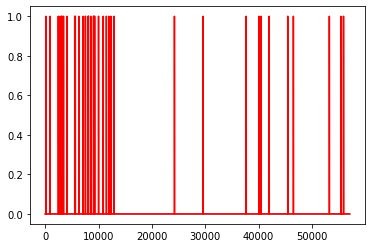

In [19]:
y_predict = model.predict(X_test)
print(y_predict)
print(Y_test)
print(y_predict.shape)
print(Y_test.shape)
print(y_predict[0])
Y_test = np.array(Y_test,dtype="int")
Y_test = np.expand_dims(Y_test, axis=1)
plt.plot(y_predict)
plt.plot(Y_test,'r')
#plt.plot(y_predict,'r')
#ACC
error = 0
#summary = 0
for i in range(57056) :
    if (y_predict[i] == Y_test[i]) :
      error = error + 1
acc = error/57056
print(acc)
print(error)

In [62]:
y_predict1 = model.predict(df_test)
print(y_predict1)
print(df_test)
print(y_predict1.shape)
print(df_test.shape)
#print(y_predict[0])
df_test = np.array(df_test,dtype="int")
df_test = np.expand_dims(df_test, axis=1)
#plt.plot(y_predict1)
#plt.plot(Y_test,'r')
#plt.plot(y_predict,'r')
#ACC
error = 0
#summary = 0
for i in range(57056) :
    if (y_predict1[i] == df_test[i]) :
      error = error + 1
acc = error/57056
print(acc)
print(error)

ValueError: in user code:

    C:\Users\HT\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:1569 predict_function  *
        return step_function(self, iterator)
    C:\Users\HT\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\HT\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\HT\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\HT\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\HT\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:1552 run_step  **
        outputs = model.predict_step(data)
    C:\Users\HT\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:1525 predict_step
        return self(x, training=False)
    C:\Users\HT\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\HT\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:230 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_5 is incompatible with the layer: : expected min_ndim=3, found ndim=2. Full shape received: (None, 224)


In [61]:
df_test.shape
df_test.head()

,index,CUST_ID,OPEN_ORG_NUM,GENDER,LAST_OPEN_TENURE_DAYS,L3_DR_AMT,L3_DR_CNT,DR_AMT,DR_CNT,L3_CR_AMT,...,CHANNEL_AUTO_DOUTTA_AMT,CHANNEL_AUTO_DOUTTA_CNT,L3_CHANNEL_AUTO_DTAIN_AVGAMT,L3_CHANNEL_AUTO_DOUTTA_AVGAMT,L3_CHANNEL_AUTO_DTAIN_AVGCNT,L3_CHANNEL_AUTO_DOUTTA_AVGCNT,L6_CHANNEL_AUTO_DTAIN_AVGAMT,L6_CHANNEL_AUTO_DOUTTA_AVGAMT,L6_CHANNEL_AUTO_DTAIN_AVGCNT,L6_CHANNEL_AUTO_DOUTTA_AVGCNT
0,0,1000000239,1101,0,0,0.00,0,0.0,0,0.00,...,0.0,0,766.666667,0.000000,0.666667,0.000000,1016.666667,0.0,0.5,0.0
1,1,1000003260,602,1,10,797929.58,7,181398.1,3,782289.02,...,3000.0,1,0.000000,3333.333333,0.000000,1.666667,0.000000,2500.0,0.0,1.5
2,2,1000003414,606,1,0,0.00,0,0.0,0,0.00,...,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,3,1000004746,602,1,33,0.00,0,0.0,0,0.00,...,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,4,1000005243,602,0,0,0.00,0,0.0,0,0.00,...,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
